<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

----

This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [**here**](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

In [28]:
# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [29]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [30]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the Date column to a datetime type**

Use **pd.to_datetime** to convert the Date column to a datetime.

**WARNING**: The date column is formatted as day-month-year. Does **pd.to_datetime** work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check the [**documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for **pd.to_datetime**, and see if one of the settings fixes things.

In [31]:
pox['date'] = pd.to_datetime(pox['date'], format="%d/%m/%Y")

In [32]:
pox.head()

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


**Set the **Date** column to be the index**

In [33]:
pox.set_index('date', inplace = True)
pox.sort_index(inplace = True)

---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [34]:
pox.describe()

,budapest_cases
count,522.000000
mean,101.245211
std,76.354872
min,0.000000
25%,34.250000
50%,93.000000
75%,149.000000
max,479.000000


**Plot a histogram of the Budapest cases column**

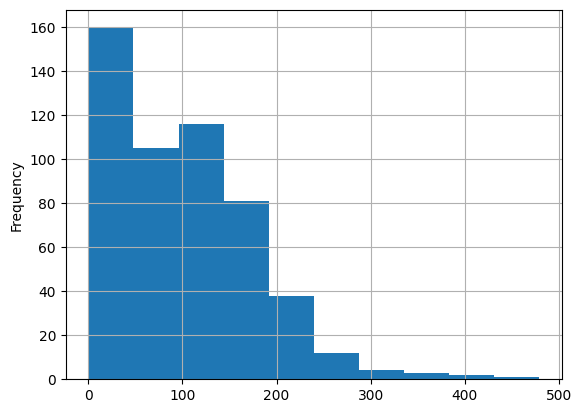

In [44]:
pox['budapest_cases'].plot(kind='hist')
plt.grid(True);

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method on the DataFrame to answer this question.

In [45]:
pox.resample('YE').sum().head(10)

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


### Visualizations

**Make a line plot of chickenpox cases**

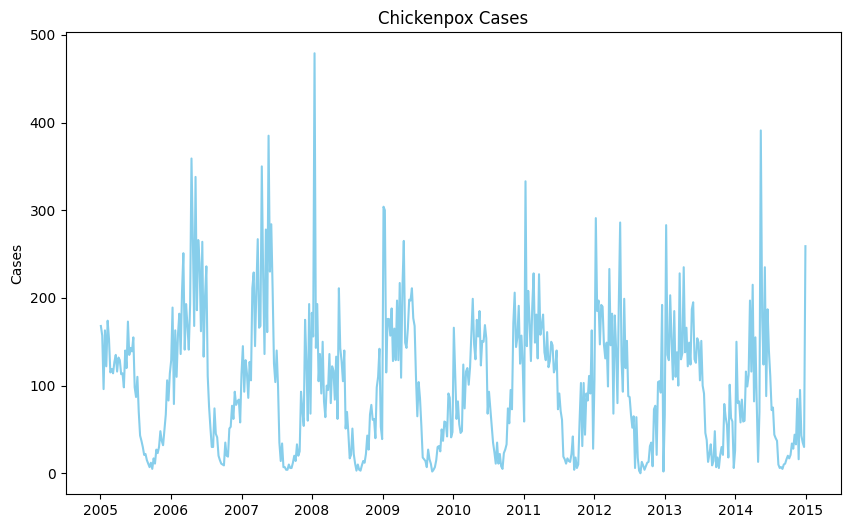

In [49]:
plt.figure(figsize=(10,6))
plt.plot(pox['budapest_cases'], color = 'skyblue', label = 'Budapest Cases')
plt.title('Chickenpox Cases')
plt.ylabel('Cases')
plt.show()

**In short answer format, describe any apparent trends**

In [50]:
# This plot show yearly pattern 

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

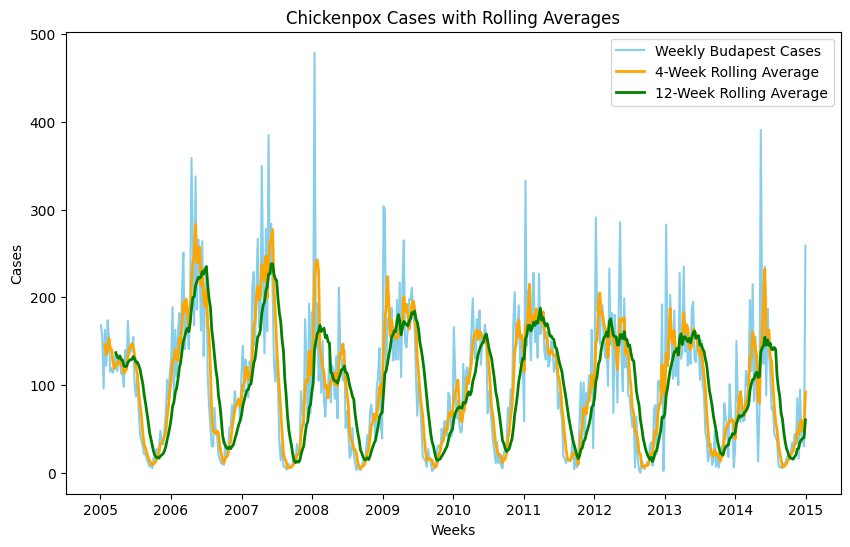

In [54]:
week_avg = pox['budapest_cases']
four_week_avg = pox['budapest_cases'].rolling(window=4).mean()
twelve_week_avg = pox['budapest_cases'].rolling(window=12).mean()

plt.figure(figsize=(10, 6))
plt.plot(week_avg, color='skyblue', label='Weekly Budapest Cases')
plt.plot(four_week_avg, color='orange', label='4-Week Rolling Average', linewidth=2)
plt.plot(twelve_week_avg, color='green', label='12-Week Rolling Average', linewidth=2)

plt.title('Chickenpox Cases with Rolling Averages')
plt.ylabel('Cases')
plt.xlabel('Weeks')

plt.legend()

plt.show()

### Plot yearly chickenpox cases

You may need to use [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again for this.

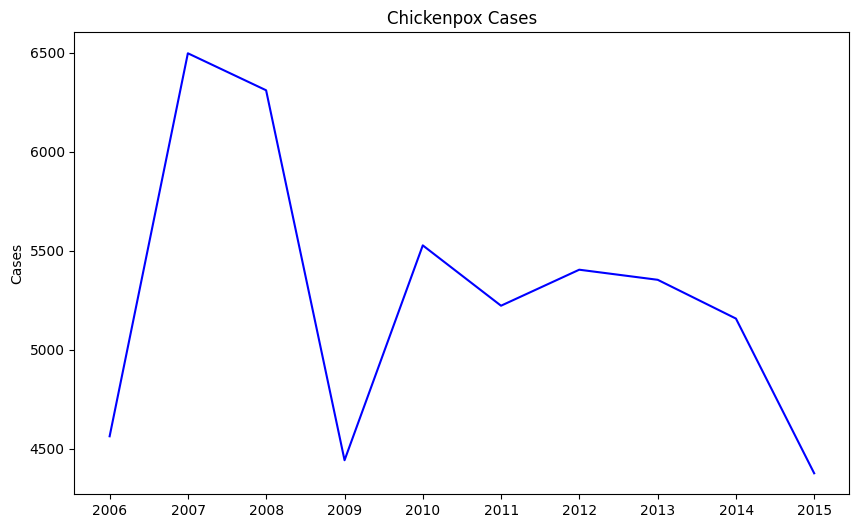

In [56]:
plt.figure(figsize=(10,6))
plt.plot(pox.resample('YE').sum(), color = 'blue', label = 'Yearly Budapest Cases')
plt.title('Chickenpox Cases')
plt.ylabel('Cases')
plt.show()